In [1]:
import sys
# sys.path.insert(0, '../../')
import rasterio
import numpy as np
from pathlib import Path
import rioxarray

In [2]:
%load_ext autoreload

In [3]:
RASTER_PATH = Path("../../data/geolifeclef-2022")
# RASTER_PATH = "s3://datasets-sdm/geoLifeCLEF/rasters/"

BUCKET_NAME = 'datasets-sdm'
folder = 'geoLifeCLEF/rasters'
s3_raster_path = 's3://{}/{}/'.format(BUCKET_NAME, folder)

In [4]:
%autoreload 2
from environmental_raster import PatchExtractor

## Test stuff -- ignore

In [200]:
filename = s3_raster_path + "{}/{}_{}.tif".format("bio_11", "bio_11", "USA")
# filename = s3_raster_path + "{}/{}_{}.tif".format("cecsol", "cecsol", "USA")

MIN_ALLOWED_VALUE = -10000
nan = None

# with rasterio.vrt.WarpedVRT(filename, crs="EPSG:32610") as src:
#     # self.dataset = dataset
#     raster = dataset.read(1, masked=True, out_dtype=np.float32)
src = rasterio.open(filename, nodata=nan)

x_min = src.bounds.left
y_min = src.bounds.bottom
x_resolution = src.res[0]
y_resolution = src.res[1]
n_rows = src.height
n_cols = src.width

# loading the raster
raster = np.squeeze(src.read())
src.close()

raster = raster.astype(float)

# value bellow min_value are considered incorrect and therefore no_data
raster[raster < MIN_ALLOWED_VALUE] = None
raster[np.isnan(raster)] = None
#convert to 0-255, and then to uint8
raster = (255 * (raster - np.nanmin(raster)) / (np.nanmax(raster) - np.nanmin(raster))).astype(np.uint8)
raster

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [35]:
np.nanmax(raster), np.nanmin(raster), np.nanstd(raster), np.nanmean(raster)

(255, 0, 62.41662445487879, 40.128194853020986)

(array([[3237.,    0.,    0., ...,    0.,    0.,    0.],
        [3236.,    0.,    0., ...,    0.,    0.,    0.],
        [3234.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [2820.,  113.,  268., ...,    0.,    0.,    0.],
        [2829.,  110.,  266., ...,    0.,    0.,    0.],
        [2828.,  111.,  266., ...,    0.,    0.,    0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 7200 BarContainer objects>)

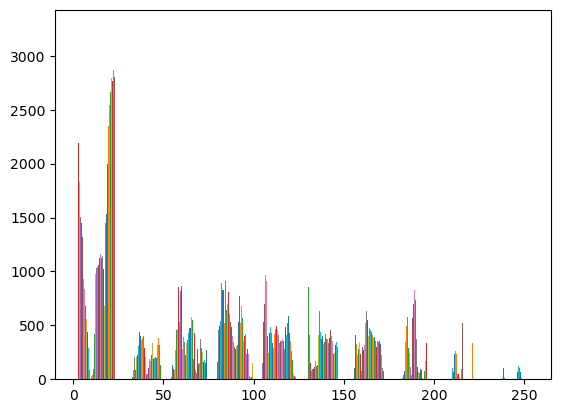

In [202]:
plt.hist(raster)

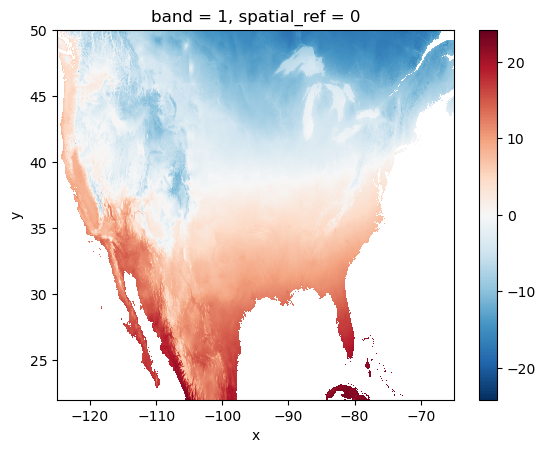

In [34]:
rds = None
filename = s3_raster_path + "{}/{}_{}.tif".format("bio_11", "bio_11", "USA")
with rasterio.Env():
    with rasterio.open(filename, "r") as src:
        with rasterio.vrt.WarpedVRT(src, crs="EPSG:4326") as vrt:
            rds = rioxarray.open_rasterio(vrt, masked=True)
            # rds = rds.rio.reproject("EPSG:32610", nodata=None)
            rds.sel(band=1).plot.imshow()
            
        

<xarray.DataArray (band: 1, y: 22036, x: 31441)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 2.936e+05 2.939e+05 ... 7.275e+06 7.275e+06
  * y            (y) float64 7.326e+06 7.326e+06 ... 2.433e+06 2.433e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  385
    STATISTICS_MEAN:     nan
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   nan
    scale_factor:        1.0
    add_offset:          0.0


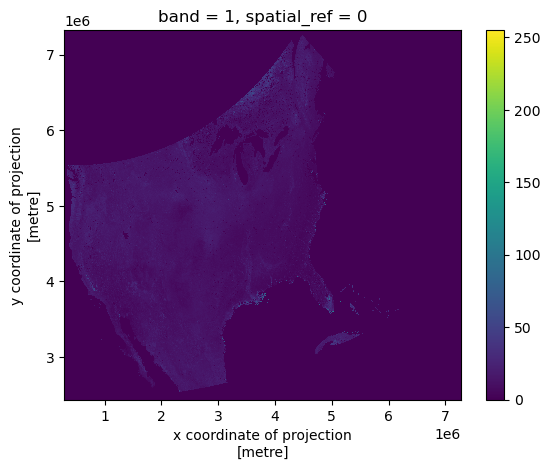

In [5]:
raster = None
filename = s3_raster_path + "{}/{}_{}.tif".format("cecsol", "cecsol", "USA")
# filename = s3_raster_path + "{}/{}_{}.tif".format("bio_4", "bio_4", "USA")
dst_crs = 'EPSG:32610'

with rasterio.Env():
    with rasterio.open(filename, "r") as f:

        raster = rioxarray.open_rasterio(f, masked=True)#.rio.clip([mask_geom], from_disk=True)
        raster = raster.rio.reproject(dst_crs)

print(raster)
#convert to 0-255, and then to uint8
raster.data = (255 * (raster.data - np.nanmin(raster.data)) / (np.nanmax(raster.data) - np.nanmin(raster.data))).astype(np.uint8)
# raster.data = raster.data.filled(0)
raster.sel(band=1).plot.imshow()

In [20]:
len(raster.band)

1

In [7]:
raster.values.mean(), raster.values.std()

(4.459760700269223, 6.987447917277084)

In [126]:
import shapely
point_geom = shapely.geometry.mapping(shapely.geometry.Point(berkeley))
point_geom

AttributeError: module 'shapely' has no attribute 'geometry'

In [31]:
import IPython
import torch
import torchvision.transforms as T

to_pil = T.ToPILImage()


t = torch.from_numpy(raster)
display = to_pil(t)
    

In [50]:
display.show()

## Using PatchExtractor

In [51]:

BUCKET_NAME = 'datasets-sdm'
folder = 'geoLifeCLEF/rasters'
s3_raster_path = 's3://{}/{}/'.format(BUCKET_NAME, folder)

In [106]:
%autoreload 2
from environmental_raster import PatchExtractor

s3://datasets-sdm/geoLifeCLEF/rasters/
Opening Raster file for  bio_1
Completed Setup of Raster bio_1 in CRS = EPSG:32610 and dtype float32
Opening Raster file for  cecsol
Completed Setup of Raster cecsol in CRS = EPSG:32610 and dtype float32
Opening Raster file for  phihox
Completed Setup of Raster phihox in CRS = EPSG:32610 and dtype float32


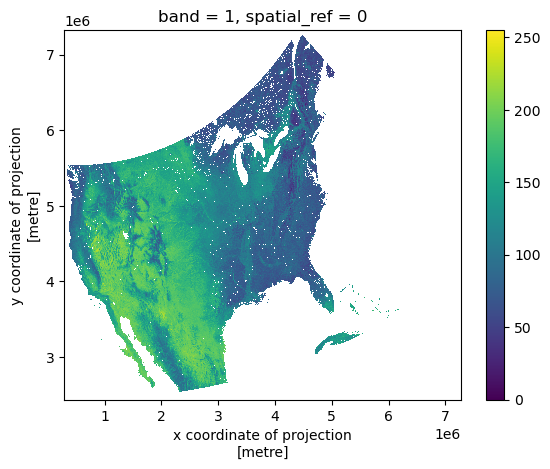

In [152]:
print(s3_raster_path)
extractor = PatchExtractor(s3_raster_path, side_len_m=5000, side_px=256)
# extractor = PatchExtractor(RASTER_PATH, side_len_m=50000, side_px=256)
extractor.append("bio_1", display=False)
# extractor.append("bio_11", out_of_bounds="error")
extractor.append("cecsol", display=False)
extractor.append("phihox", display=True)
# extractor.add_all_rasters()


In [160]:
# patch = extractor[ -124.36556, 40.23088]
# berkeley = (-122.2629862, 37.8879003)
berkeley = (-122.240558, 37.90588)
crs = 'EPSG:32610'
coordinates = (berkeley, crs)
# coordinates = ((-124.36556, 40.23088), crs)
patch = extractor[coordinates]
# coordinates[0][1]

EPSG:32610 -122.240558 37.90588
torch.Size([1, 256, 256]) <class 'torch.Tensor'>
EPSG:32610 -122.240558 37.90588
torch.Size([1, 256, 256]) <class 'torch.Tensor'>
EPSG:32610 -122.240558 37.90588
torch.Size([1, 256, 256]) <class 'torch.Tensor'>


In [153]:
patch.shape, type(patch)

((3, 256, 256), numpy.ndarray)

In [155]:
patch

array([[[162, 162, 162, ..., 163, 163, 163],
        [162, 162, 162, ..., 163, 163, 163],
        [162, 162, 162, ..., 163, 163, 163],
        ...,
        [  0,   0,   0, ..., 159, 159, 159],
        [  0,   0,   0, ..., 159, 159, 159],
        [  0,   0,   0, ..., 159, 159, 159]],

       [[ 22,  22,  23, ...,  24,  25,  25],
        [  4,   4,  16, ...,  24,  23,  23],
        [  0,   0,  14, ...,  20,  21,  24],
        ...,
        [  0,   0,   0, ...,  19,  18,  19],
        [  0,   0,   0, ...,  19,  19,  19],
        [  0,   0,   0, ...,  18,  19,  18]],

       [[121, 121, 118, ..., 119, 123, 113],
        [ 22,  22,  91, ..., 120, 113, 120],
        [  0,   0,  84, ..., 119, 113, 118],
        ...,
        [  0,   0,   0, ..., 118, 122, 115],
        [  0,   0,   0, ..., 116, 121, 120],
        [  0,   0,   0, ..., 118, 120, 117]]], dtype=uint8)

In [156]:
patch.max(), patch.min(), patch.std()

(175, 0, 69.05867539433461)

In [161]:
import IPython
import torch
import torchvision.transforms as T

to_pil = T.ToPILImage()


t = torch.from_numpy(patch[2,:,:])
display = to_pil(t)
# display.show()
display.save('test.png')

TypeError: Invalid shape (3, 256, 256) for image data

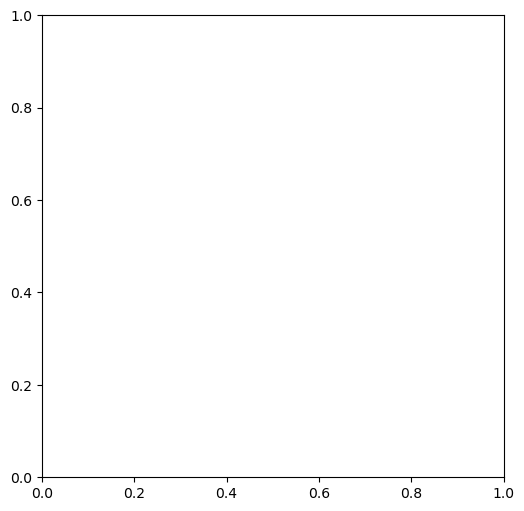

In [162]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
plt.imshow(patch)
extractor.plot((berkeley), fig=fig)

In [164]:
del extractor, patch

import gc
gc.collect()

45139